<a href="https://colab.research.google.com/github/byambaa1982/data_analysis/blob/master/kishore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import LabelEncoder
import seaborn as sb

%matplotlib inline


In [0]:
df_orig=pd.read_excel("/content/data1.xlsx")

In [0]:
df=df_orig[['Reason', 'Instr Bal','Paid','Last Pay Dt','First Pay Dt','Tel 1', 'Email']]

## Let's take a loot data.
"Last Pay Dt" and "First Pay Dt" have 56654 missing data out of 67325.
A lot of missing data

In [65]:
print(df_orig.shape)
print(df.isnull().sum())

(67325, 71)
Reason           3028
Instr Bal          41
Paid               41
Last Pay Dt     56654
First Pay Dt    56654
Tel 1           39369
Email            6579
dtype: int64


In [66]:
df_corr=df_orig[['Reason', 'Instr Bal','Paid','Tel 1', 'Email']]
df_corr.dropna(thresh=2, inplace=True)
df_corr['Reason']=df_corr['Reason'].map(lambda x: 1 if x=='PIF' or x=='PP' or x=='PAID' else 0)
df_corr['Instr Bal'] = df_corr['Instr Bal'].map(lambda x: x.replace('£', '') if type(x)==str else x)
df_corr['Instr Bal'] = df_corr['Instr Bal'].map(lambda x: x.replace(',', '') if type(x)==str else x)
df_corr['Instr Bal'] = df_corr['Instr Bal'].map(lambda x: float(x) if type(x)==str else x)
df_corr['Paid'] = df_corr['Paid'].map(lambda x: x.replace('£', '') if type(x)==str else x)
df_corr['Paid'] = df_corr['Paid'].map(lambda x: x.replace(',', '') if type(x)==str else x)
df_corr['Paid'] = df_corr['Paid'].map(lambda x: float(x) if type(x)==str else x)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

## Let's see some statistics

In [67]:
df_corr.describe()

,Reason,Instr Bal,Paid
count,67284.000000,67284.000000,67284.000000
mean,0.088862,1036.258121,39.062512
std,0.284547,1070.552384,141.887675
min,0.000000,0.010000,0.000000
25%,0.000000,296.400000,0.000000
50%,0.000000,777.100000,0.000000
75%,0.000000,1331.200000,0.000000
max,1.000000,35643.230000,5100.000000


In [0]:
df = df_orig.loc[:, df_orig.isnull().sum() < 0.9*df_orig.shape[0]]
df=df.dropna()
df['Instr Bal'] = df['Instr Bal'].str.replace('£', '')
df['Instr Bal'] = pd.to_numeric(df['Instr Bal'],errors='coerce')
df['Paid'] = df['Paid'].str.replace('£', '')
df['Paid'] = pd.to_numeric(df['Paid'],errors='coerce')
# df['Adjusted'] = df.apply(lambda x: float(x['Adjusted'].replace('£', '')),axis=1)
# df['Adjusted'] = df['Adjusted'].str.replace('£', '')
# df['Adjusted'] = pd.to_numeric(df['Adjusted'],errors='coerce')
# df['Interest'] = df['Interest'].str.replace('£', '')
# df['Interest'] = pd.to_numeric(df['Interest'],errors='coerce')
# df['Inv Balance'] = df['Inv Balance'].str.replace('£', '')
# df['Inv Balance'] = pd.to_numeric(df['Inv Balance'],errors='coerce')
# df['Bal Inc Int'] = df['Bal Inc Int'].str.replace('£', '')
# df['Bal Inc Int'] = pd.to_numeric(df['Bal Inc Int'],errors='coerce')
df['Last Pay Amt'] = df['Last Pay Amt'].str.replace('£', '')
df['Last Pay Amt'] = pd.to_numeric(df['Last Pay Amt'],errors='coerce')
df['First Pay Amt'] = df['First Pay Amt'].str.replace('£', '')
df['First Pay Amt'] = pd.to_numeric(df['First Pay Amt'],errors='coerce')
df['Arr Amount'] = df['Arr Amount'].str.replace('£', '')
df['Arr Amount'] = pd.to_numeric(df['Arr Amount'],errors='coerce')
df['Reason']=df['Reason'].map(lambda x: 1 if x=='PIF' or x=='PP' or x=='PAID' else 0)



1. How much in payments are received by month and by 'portfolio'?
2. What needs to be included is the amount of the original debt (Instr Bal)?
3. what was collected recently (Last Pay Amt) broken down by month, from (Last Pay Dt).
4. how much is being collected each month, from each portfolio,
5. what percentage of the outstanding balance of each portfolio is collected each month. 
6. How the collections are trending are they improving or declining? 
7. which portion is improving or declining? 
8. Is there any correlation with collections and the telephone number first 5 digits? (Tel 1, Tel2, Tel3) 
9. Is there a correlation with amount collected and email.




<Figure size 1872x1440 with 0 Axes>

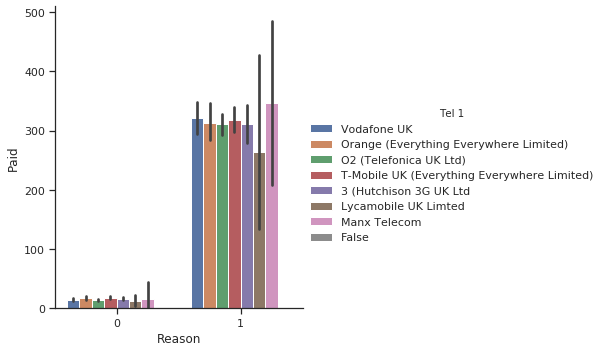

In [69]:
plt.figure(figsize=(26, 20))
sns.catplot(x="Reason", y="Paid", hue="Tel 1", kind="bar", data=df_corr)

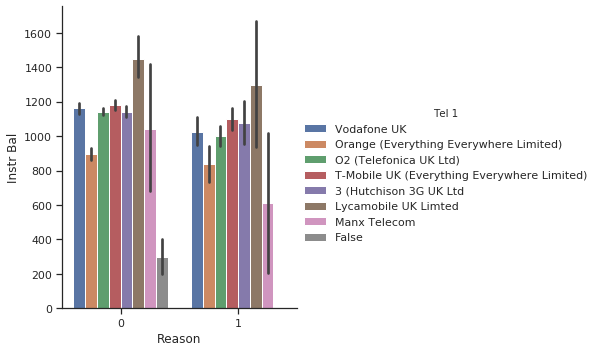

In [70]:
sns.catplot(x="Reason", y="Instr Bal", hue="Tel 1", kind="bar", data=df_corr)

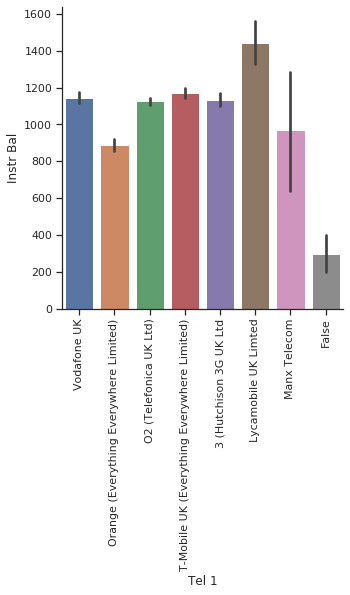

In [71]:
g=sns.catplot(x="Tel 1", y="Instr Bal", kind="bar", data=df_corr)
g.set_xticklabels(rotation=90)

## What is the most popular phone operator?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


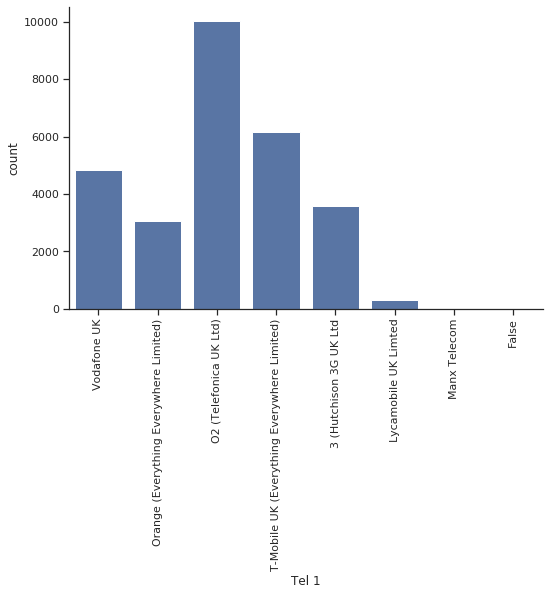

In [72]:
g = sns.factorplot("Tel 1", data=df_corr, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=90)

## There are 1479 different email domains. 

In [73]:
len(df_corr.Email.value_counts())

1479

## The most popular email domains are gmail.com, hotmail.co.uk, 
## hotmail.com, yahoo.co.uk and live.co.uk

In [74]:
df_corr.Email.value_counts()

gmail.com                 13956
hotmail.co.uk             12822
hotmail.com                8016
yahoo.co.uk                4122
live.co.uk                 3368
                          ...  
wilkinson-helsby.co.uk        1
altnation.com                 1
kcom.co.uk                    1
gmx.co                        1
agema-ind.com                 1
Name: Email, Length: 1479, dtype: int64

In [0]:
df_corr_dr=df_corr[df_corr.Email.isin(['gmail.com','yahoo.co.uk','hotmail.com','hotmail.co.uk','live.co.uk'])]

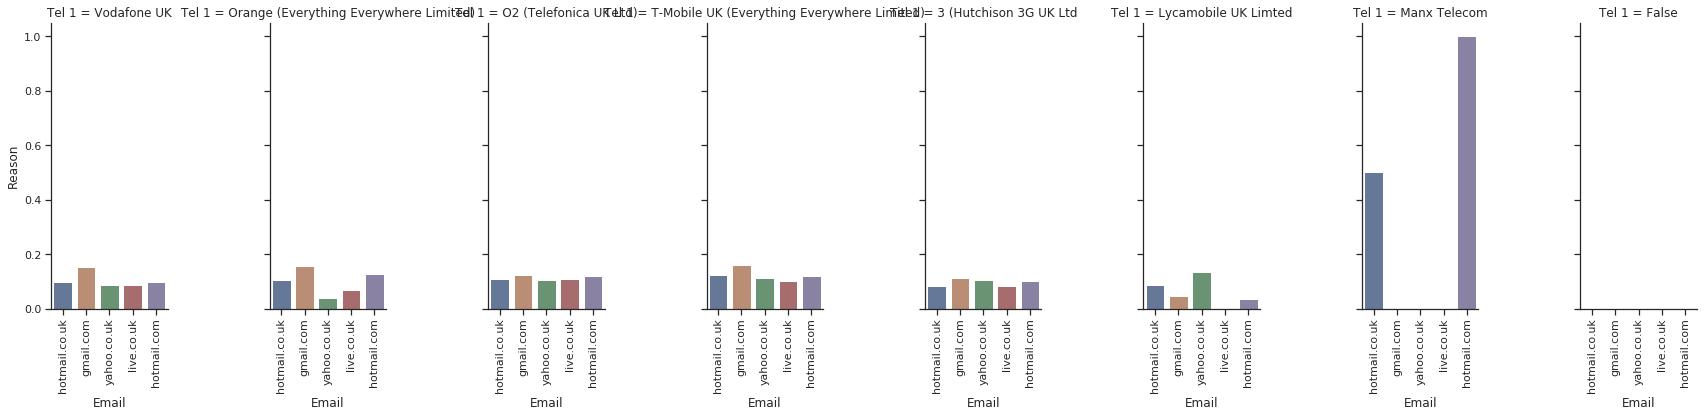

In [76]:
g = sns.catplot(x="Email", y="Reason", col="Tel 1",
                data=df_corr_dr, saturation=.5,
                 kind="bar", ci=None, aspect=.6)
g.set_xticklabels(rotation=90)

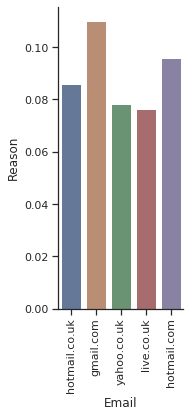

In [77]:
g = sns.catplot(x="Email", y="Reason",
                data=df_corr_dr, saturation=.5,
                 kind="bar", ci=None, aspect=.6)
g.set_xticklabels(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


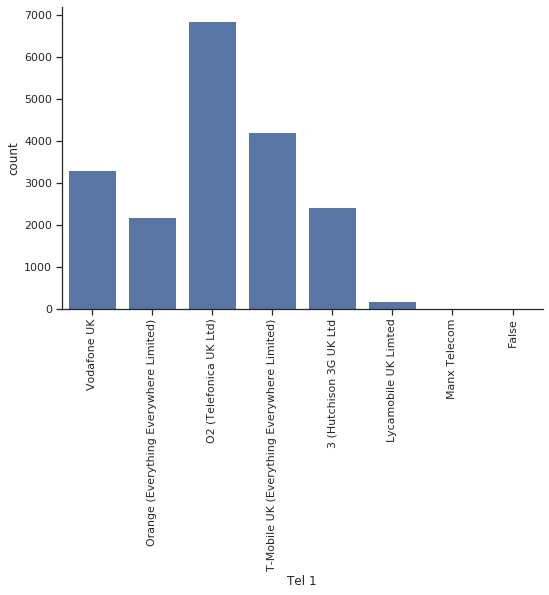

In [78]:
g = sns.factorplot("Tel 1", data=df_corr_dr, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=90)

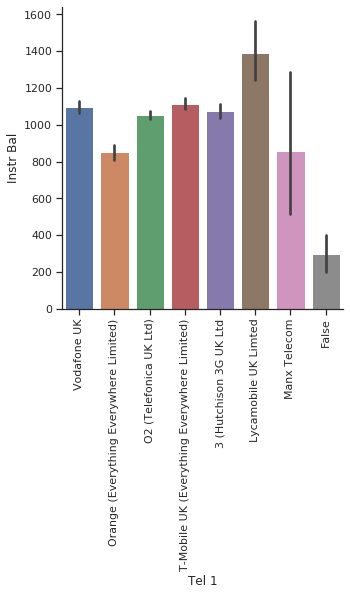

In [79]:
g=sns.catplot(x="Tel 1", y="Instr Bal", kind="bar", data=df_corr_dr)
g.set_xticklabels(rotation=90)

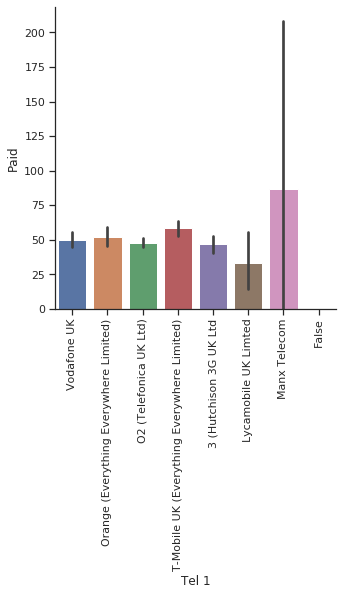

In [80]:
g=sns.catplot(x="Tel 1", y="Paid", kind="bar", data=df_corr_dr)
g.set_xticklabels(rotation=90)

In [0]:
df_corr_dr.to_excel('pop_email.xlsx')

In [0]:
le = LabelEncoder()

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
df_corr_dr.head()

,Reason,Instr Bal,Paid,Tel 1,Email
5,1,524.76,524.76,NaN,hotmail.co.uk
9,0,1198.41,0.00,NaN,gmail.com
10,0,594.48,0.00,NaN,yahoo.co.uk
12,1,614.20,614.20,NaN,yahoo.co.uk
13,1,530.11,690.11,NaN,yahoo.co.uk


In [0]:
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [0]:
import seaborn as sb

## Let’s start by making a correlation matrix heatmap for the email data set.

In [0]:
df_con.to_excel('five_pop_email.xlsx')

## The most five popular email domains

In [0]:
df=df_corr[df_corr.Email.isin(['gmail.com','yahoo.co.uk','hotmail.com','hotmail.co.uk','live.co.uk'])]
df=df[['Reason', 'Instr Bal', 'Paid', 'Email']]

In [0]:
df.to_excel('five_the_most_pop_email.xlsx')

In [0]:
X_train=df[["Email"]]
le = MultiColumnLabelEncoder()
X_train_le = le.fit_transform(X_train)
df_con=pd.concat([df_corr_dr.iloc[:,0:3],X_train_le], axis=1)
pearsoncorr=df_con.corr(method='pearson')

## Correlation Matrix

In [91]:
df_con.corr()

,Reason,Instr Bal,Paid,Email
Reason,1.000000,-0.051981,0.613178,-0.033493
Instr Bal,-0.051981,1.000000,0.030292,-0.026791
Paid,0.613178,0.030292,1.000000,-0.021320
Email,-0.033493,-0.026791,-0.021320,1.000000


## Heat map

In [0]:
import altair as alt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Let’s start by making a correlation matrix heatmap for phone data set.

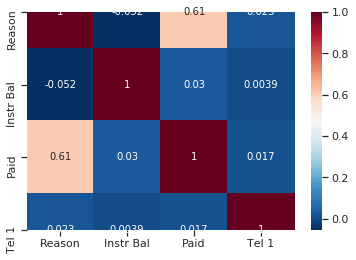

In [103]:
g=sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
          )

In [93]:
df=df_corr.iloc[:,0:4]
df.dropna(inplace=True)
df['Tel 1']=df['Tel 1'].map(lambda x: str(x) if type(x)!=str else x)
X_train=df[["Tel 1"]]
le = MultiColumnLabelEncoder()
X_train_le = le.fit_transform(X_train)
df_con=pd.concat([df_corr_dr.iloc[:,0:3],X_train_le], axis=1)
pearsoncorr=df_con.corr(method='pearson')
df_con.corr()

,Reason,Instr Bal,Paid,Tel 1
Reason,1.000000,-0.051981,0.613178,0.023120
Instr Bal,-0.051981,1.000000,0.030292,0.003897
Paid,0.613178,0.030292,1.000000,0.016912
Tel 1,0.023120,0.003897,0.016912,1.000000


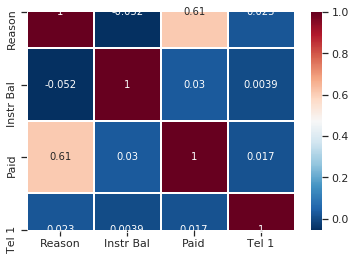

In [105]:
g=sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidths=.9
          )

In [0]:
df.to_excel('phone_operators.xlsx')

## How much in payments are received by month and by 'portfolio'?

In [96]:
df_short=df_orig[['Reason', 'Instr Bal','Paid','Last Pay Dt','First Pay Dt','Tel 1', 'Email']]
df_short.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### After removed all empty sells, there are 5384 rows out of over 67000

In [97]:
df_short.shape

(5384, 7)

In [98]:
df_short=df_orig[['Reason', 'Instr Bal','Paid','Last Pay Dt','First Pay Dt','Tel 1', 'Email']]
df_short.dropna(inplace=True)
df_short['Last Pay Dt']=df_short['Last Pay Dt'].map(lambda x: datetime.strptime(x,'%d/%m/%y') if type(x)==str else x )
df_short['First Pay Dt']=df_short['First Pay Dt'].map(lambda x: datetime.strptime(x,'%d/%m/%y') if type(x)==str else x )
df_short['diff_months'] = df_short['Last Pay Dt'] - df_short['First Pay Dt']
df_short['diff_months']=df_short['diff_months']/np.timedelta64(1,'M')
df_short['Paid'] = df_short['Paid'].map(lambda x: x.replace('£', '') if type(x)==str else x)
df_short['Paid'] = df_short['Paid'].map(lambda x: x.replace(',', '') if type(x)==str else x)
df_short['Paid'] = df_short['Paid'].map(lambda x: float(x) if type(x)==str else x)
df_short['per_month_pay']=df_short['Paid']/np.around(df_short['diff_months']+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [0]:
df_short=df_short.iloc[1:,:]
df_short.to_excel('per_month_pay.xlsx')